In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [41]:
l = pd.read_csv('ledgers.csv')
t = pd.read_csv('transactions.csv')

In [44]:
t.head()

,Unnamed: 0,Sequence,InvoiceID,SourceTag,DestinationTag,Flags,Fee,Destination,hash,Account,...,AmountDEX,TakerGetsDEX,TakerPaysDEX,SendMaxDEX,LimitAmountDEX,SendMinDEX,DeliverMinDEX,currency,issuer,value
0,0,23387,NaN,NaN,NaN,2.147484e+09,15,rDmr2ahgmi9JWTAtjrHmYoQPyhtDSiyPX2,FB8D5C02C1E1CCBD5F06C48E134A377EDC14F7EE1122A9...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,23382,NaN,NaN,NaN,2.147484e+09,15,rDwUMs262c65NmMp7m7Lb7WDKQrS1FWhPY,CE706FDD821AC99B44E64570AB7D25C24015F720FD0477...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,23377,NaN,NaN,NaN,2.147484e+09,15,rnn4sCdC5jTCRRkPxxSbrrphSVYKZ4R7M5,A3F8A28B2AA82822B135BD34B15D6E6D7BE883B52E61DF...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,23388,NaN,NaN,NaN,2.147484e+09,15,rENQkSxhcZ4psfe1c2QpZr65eFg7Sh2tYR,1BCD8E4FB4EA778A13F7E9846AA03F02B742C97ACE453D...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,23370,NaN,NaN,NaN,2.147484e+09,15,rDuDTWBwh4m62rTotAr5Hv8e8Tgt91ZV32,162CC4383D0AAEE023EB1FEAC61ADA0C1F8CF26EFFBD58...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
t.columns

Index(['Unnamed: 0', 'Sequence', 'InvoiceID', 'SourceTag', 'DestinationTag',
       'Flags', 'Fee', 'Destination', 'hash', 'Account', 'TransactionType',
       'DeliverMinXRP', 'SendMinXRP', 'LimitAmountXRP', 'SendMaxXRP',
       'TakerPaysXRP', 'TakerGetsXRP', 'AmountXRP', 'LedgerIndex',
       'TransactionResult', 'TransactionIndex', 'DeliveredAmount', 'Memos',
       'SignerEntries', 'Signers', 'SigningPubKey', 'TxnSignature',
       'AccountTxnID', 'SignerQuorum', 'ClearFlag', 'Domain', 'EmailHash',
       'MessageKey', 'SetFlag', 'TransferRate', 'TickSize', 'CheckID',
       'Expiration', 'Authorize', 'Owner', 'OfferSequence', 'Condition',
       'FinishAfter', 'CancelAfter', 'Fulfillment', 'LastLedgerSequence',
       'SettleDelay', 'RegularKey', 'QualityIn', 'QualityOut', 'Amendment',
       'LedgerSequence', 'BaseFee', 'ReferenceFeeUnits', 'ReserveBase',
       'ReserveIncrement', 'AmountDEX', 'TakerGetsDEX', 'TakerPaysDEX',
       'SendMaxDEX', 'LimitAmountDEX', 'SendMinDEX', 

In [102]:
t.groupby('TransactionType').Fee.mean().to_frame().reset_index()

,TransactionType,Fee
0,AccountSet,20.453309
1,OfferCancel,18892.402022
2,OfferCreate,2904.302374
3,Payment,3763.269280
4,SignerListSet,3000.000000
5,TrustSet,13.828571


In [45]:
t.shape

(100000, 66)

In [5]:
df0 = t.groupby('currency').Fee.count().to_frame().reset_index()

In [6]:
df0

,currency,Fee
0,ADA,25
1,AGC,549
2,AUD,2
3,BRL,438
4,BTC,24199


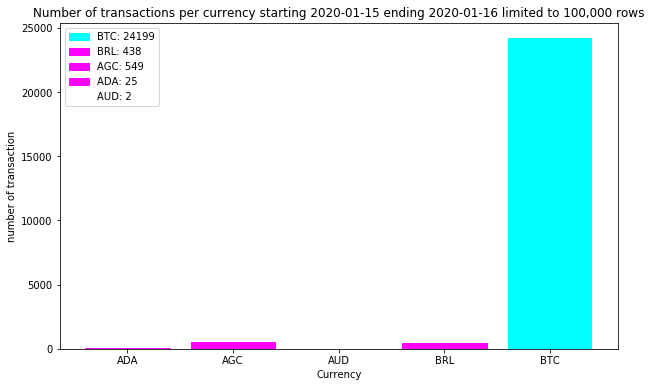

In [7]:
plt.figure(figsize=(10,6))

x = df0['currency']   
y = df0['Fee']

barlist = plt.bar(x,y, color='cyan')
barlist[0].set_color('magenta')
barlist[1].set_color('magenta')
barlist[3].set_color('magenta')

plt.xlabel('Currency') 
plt.ylabel('number of transaction')
plt.title('Number of transactions per currency starting 2020-01-15 ending 2020-01-16 limited to 100,000 rows')

NA = mpatches.Patch(color='cyan', label='BTC: 24199')
BRL = mpatches.Patch(color='magenta', label='BRL: 438')
AGC = mpatches.Patch(color='magenta', label='AGC: 549')
ADA = mpatches.Patch(color='magenta', label='ADA: 25')
AUD = mpatches.Patch(color='white', label='AUD: 2')
plt.legend(handles=[NA,BRL,AGC,ADA,AUD], loc=2)

plt.show()

## Most transactions used BTC

In [8]:
df1 = t.groupby('currency').Fee.mean().to_frame().reset_index()

In [9]:
df1

,currency,Fee
0,ADA,231.360000
1,AGC,1000.000000
2,AUD,10006.000000
3,BRL,614.824201
4,BTC,683.404438


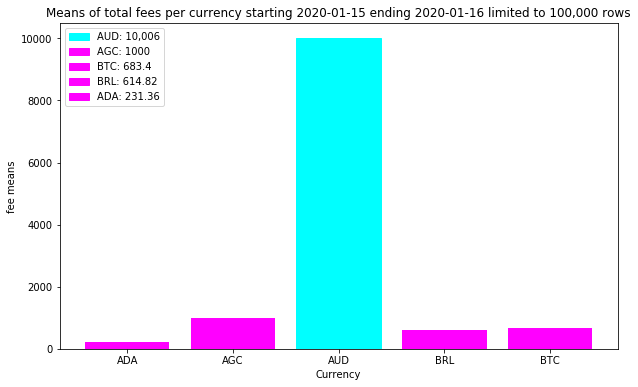

In [100]:
fig = plt.figure(figsize=(10,6))

x = df1['currency']   
y = df1['Fee']

barlist = plt.bar(x,y, color='magenta')
barlist[2].set_color('cyan')

plt.xlabel('Currency') 
plt.ylabel('fee means')
plt.title('Means of total fees per currency starting 2020-01-15 ending 2020-01-16 limited to 100,000 rows')

NA = mpatches.Patch(color='magenta', label='BTC: 683.4')
BRL = mpatches.Patch(color='magenta', label='BRL: 614.82')
AGC = mpatches.Patch(color='magenta', label='AGC: 1000')
ADA = mpatches.Patch(color='magenta', label='ADA: 231.36')
AUD = mpatches.Patch(color='cyan', label='AUD: 10,006')
plt.legend(handles=[AUD,AGC,NA,BRL,ADA], loc=2)

fig.savefig('plot1.png')
plt.show()

## Why are the fees so important for AUD & AGC transactions?

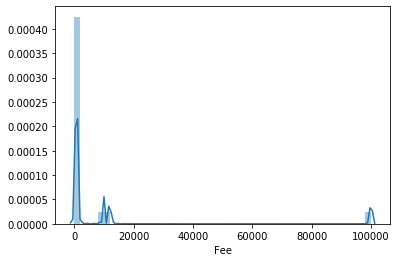

In [11]:
sns.distplot(l['Fee'])

In [15]:
t.head()

,Unnamed: 0,Sequence,InvoiceID,SourceTag,DestinationTag,Flags,Fee,Destination,hash,Account,...,AmountDEX,TakerGetsDEX,TakerPaysDEX,SendMaxDEX,LimitAmountDEX,SendMinDEX,DeliverMinDEX,currency,issuer,value
0,0,23387,NaN,NaN,NaN,2.147484e+09,15,rDmr2ahgmi9JWTAtjrHmYoQPyhtDSiyPX2,FB8D5C02C1E1CCBD5F06C48E134A377EDC14F7EE1122A9...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,23382,NaN,NaN,NaN,2.147484e+09,15,rDwUMs262c65NmMp7m7Lb7WDKQrS1FWhPY,CE706FDD821AC99B44E64570AB7D25C24015F720FD0477...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,23377,NaN,NaN,NaN,2.147484e+09,15,rnn4sCdC5jTCRRkPxxSbrrphSVYKZ4R7M5,A3F8A28B2AA82822B135BD34B15D6E6D7BE883B52E61DF...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,23388,NaN,NaN,NaN,2.147484e+09,15,rENQkSxhcZ4psfe1c2QpZr65eFg7Sh2tYR,1BCD8E4FB4EA778A13F7E9846AA03F02B742C97ACE453D...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,23370,NaN,NaN,NaN,2.147484e+09,15,rDuDTWBwh4m62rTotAr5Hv8e8Tgt91ZV32,162CC4383D0AAEE023EB1FEAC61ADA0C1F8CF26EFFBD58...,r2LXq2rZWSgQ1thhKiEytzi1smg6oEn8A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### I assume that 'value' is the amount of XRP that have been transacted

In [88]:
df2 = t.groupby(['issuer']).Fee.mean().to_frame().reset_index()

In [89]:
df2

,issuer,Fee
0,rB3gZey7VWHYRqJHLoHDEJXJ2pEPNieKiS,627.610566
1,rBfVgTnsdh8ckC19RM8aVGNuMZnpwrMP6n,12.000000
2,rG6FZ31hDHN1K5Dkbma3PSB5uVCuVVRzfn,577.335000
3,rK5DpELkCXAtBpZzEooTYzW1bymsAdE1s8,20000.000000
4,rKxKhXZCeSDsbkyB8DVgxpjy5AHubFkMFe,13.500000
5,rLEsXccBGNR3UPuPu2hUXPjziKC3qKSBun,601.038349
6,rQnUok1DNSH4q8VBSRke5cY7vtZ4H5XG9X,12.000000
7,rchGBxcD1A1C2tdxF6papQYZ8kjRKMYcL,466.870712
8,rfNZPxoZ5Uaamdp339U9dCLWz2T73nZJZH,614.824201
9,rfqspG4S6H3NLYGecx3FHHYjPeYSNCdApf,1000.000000


The issuer 'rK5DpELkCXAtBpZzEooTYzW1bymsAdE1s8' has enormous fees compared to the other. Let's learn about their transactions.

 1 AUD to USD = 0.682717 US Dollars

In [65]:
#t.set_index(['issuer', 'currency'])
#t.set_index(['issuer'])
ser = t.groupby(['issuer','currency','value']).Fee.mean()

In [66]:
ser

issuer                              currency  value       
rB3gZey7VWHYRqJHLoHDEJXJ2pEPNieKiS  ADA       12000.000000    15.0
                                              12075.000000    15.0
                                              13000.000000    15.0
                                              20000.000000    12.0
                                              65000.000000    12.0
                                                              ... 
rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B   BTC       10.758728       12.0
                                              11.362888       12.0
                                              11.622708       12.0
                                              12.236164       12.0
                                              200.000000      12.0
Name: Fee, Length: 20508, dtype: float64

In [95]:
ser.loc['rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B']

currency  value     
BTC       0.000547      15000.0
          0.000774      15000.0
          0.001461      15000.0
          0.001716      15000.0
          0.001717      15000.0
                         ...   
          10.758728        12.0
          11.362888        12.0
          11.622708        12.0
          12.236164        12.0
          200.000000       12.0
Name: Fee, Length: 233, dtype: float64

In [93]:
ser.loc['rK5DpELkCXAtBpZzEooTYzW1bymsAdE1s8']

currency  value 
AUD       147.89    20000.0
Name: Fee, dtype: float64

In [96]:
df = t.pivot_table(values='value', index='issuer', columns='currency')

In [97]:
df

currency,ADA,AGC,AUD,BRL,BTC
issuer,,,,,
rB3gZey7VWHYRqJHLoHDEJXJ2pEPNieKiS,3.969954e+06,NaN,NaN,NaN,0.392577
rBfVgTnsdh8ckC19RM8aVGNuMZnpwrMP6n,NaN,NaN,NaN,NaN,9.000000
rG6FZ31hDHN1K5Dkbma3PSB5uVCuVVRzfn,NaN,NaN,NaN,NaN,0.423508
rK5DpELkCXAtBpZzEooTYzW1bymsAdE1s8,NaN,NaN,147.89,NaN,NaN
rKxKhXZCeSDsbkyB8DVgxpjy5AHubFkMFe,NaN,NaN,NaN,NaN,0.551706
rLEsXccBGNR3UPuPu2hUXPjziKC3qKSBun,NaN,NaN,NaN,NaN,0.248797
rQnUok1DNSH4q8VBSRke5cY7vtZ4H5XG9X,NaN,NaN,5000.00,NaN,NaN
rchGBxcD1A1C2tdxF6papQYZ8kjRKMYcL,NaN,NaN,NaN,NaN,0.985067
rfNZPxoZ5Uaamdp339U9dCLWz2T73nZJZH,NaN,NaN,NaN,537.157073,NaN


In [83]:
df['BTC'].sum()

6390.033670770619

In [56]:
x = pd.unique(df['issuer'])
x

array(['rB3gZey7VWHYRqJHLoHDEJXJ2pEPNieKiS',
       'rBfVgTnsdh8ckC19RM8aVGNuMZnpwrMP6n',
       'rG6FZ31hDHN1K5Dkbma3PSB5uVCuVVRzfn',
       'rK5DpELkCXAtBpZzEooTYzW1bymsAdE1s8',
       'rKxKhXZCeSDsbkyB8DVgxpjy5AHubFkMFe',
       'rLEsXccBGNR3UPuPu2hUXPjziKC3qKSBun',
       'rQnUok1DNSH4q8VBSRke5cY7vtZ4H5XG9X',
       'rchGBxcD1A1C2tdxF6papQYZ8kjRKMYcL',
       'rfNZPxoZ5Uaamdp339U9dCLWz2T73nZJZH',
       'rfqspG4S6H3NLYGecx3FHHYjPeYSNCdApf',
       'rnuF96W4SZoCJmbHYBFoJZpR8eCaxNvekK',
       'rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B'], dtype=object)